In [1]:
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import os
import subprocess

sns.set_theme(palette='Set2', rc={'figure.figsize': (16, 9)})

process = subprocess.Popen("mpic++ main.cpp lib/Timer.cpp lib/Common.cpp lib/MPICalc.cpp -o exec && mpiexec exec",
                           shell=True,
                           stdout=subprocess.PIPE)
process.wait()

processes = {}
acceleration = {}

with (open("result.txt", "r") as file):
    for line in file:
        tokens = line.split()
        num_parts = int(tokens[0])

        if num_parts not in processes:
            processes[num_parts] = []
            acceleration[num_parts] = []

        processes[num_parts].append(int(tokens[1]))
        acceleration[num_parts].append(float(tokens[2]))

fig, axs = plt.subplots()
for num_parts in processes.keys():
    sns.lineplot(x=processes[num_parts], y=acceleration[num_parts], label=f"$10^{len(str(num_parts)) - 1}$ parts",
                 ax=axs)

axs.set_title("Calculation Acceleration")
axs.set_xlabel("Number of Processes")
axs.set_ylabel("Acceleration value")
axs.legend()

fig.savefig(f"acceleration.png")
os.remove("result.txt")
os.remove("exec")

/home/ntheme/anaconda3/envs/PyHome/bin/mpic++: line 321: x86_64-conda-linux-gnu-c++: command not found


FileNotFoundError: [Errno 2] No such file or directory: 'result.txt'

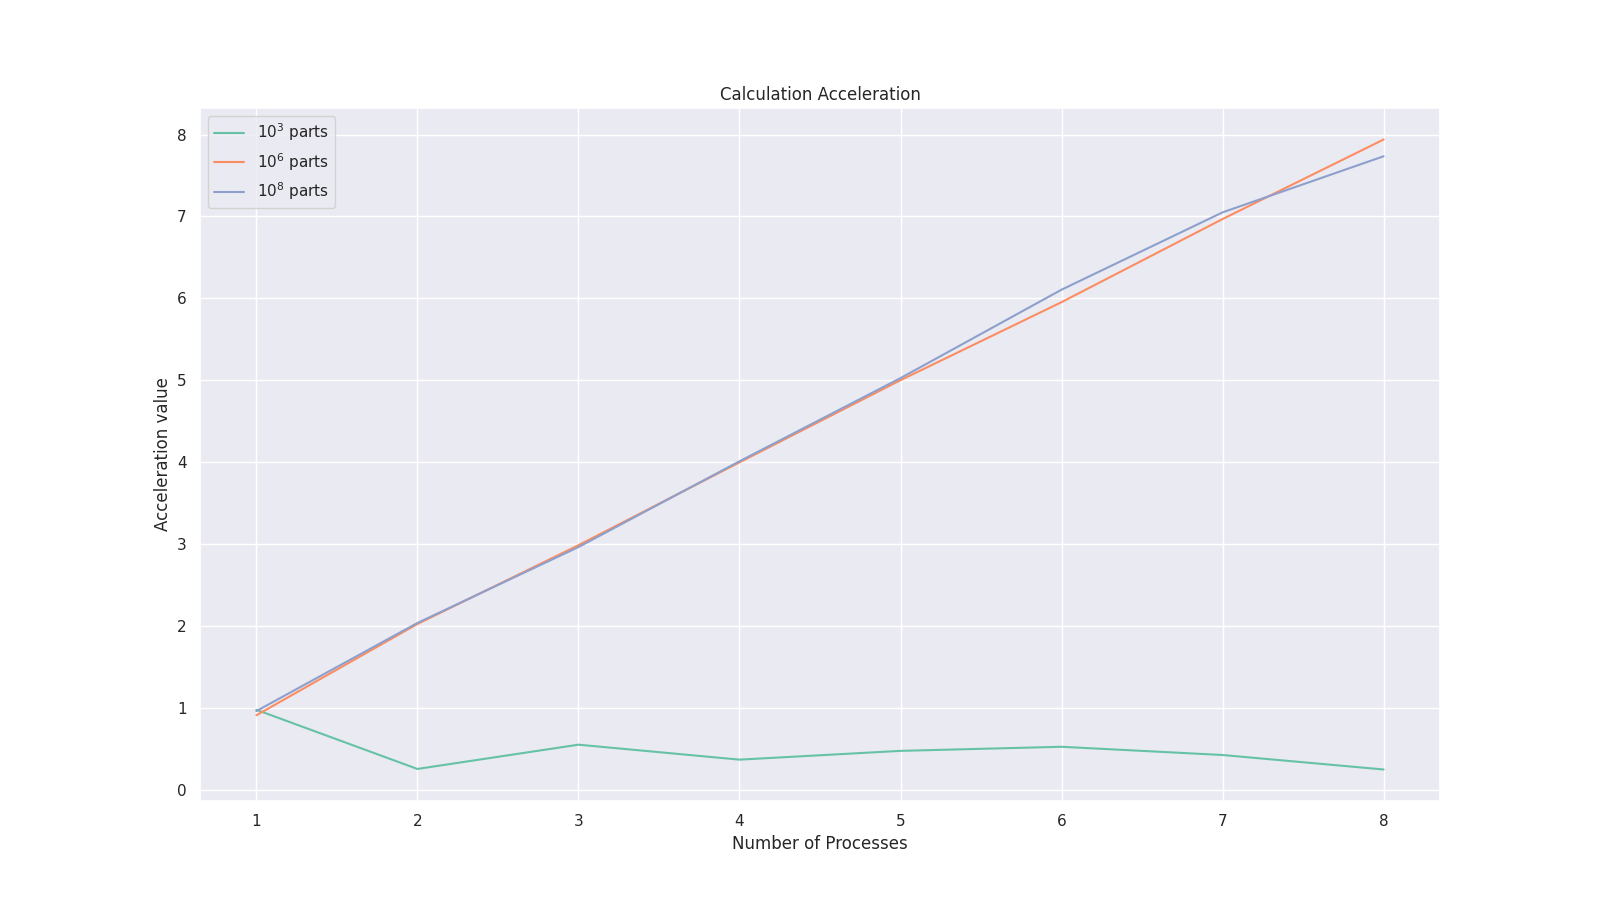